In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount("content/")
%cd content/MyDrive/MachineLearning/models/

MultiLayer Perceptron with TensorFlow

In [2]:
# Loading the mnist dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

# Normalizin the data
x_train = x_train/255.0
x_test = x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Creating a simple MLP model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

# Compiling model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(x_train.reshape((-1,28*28)),y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9703
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1020 - accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1012 - accuracy: 0.9761


In [ ]:
# Evaluation the model
model.evaluate(x_test.reshape((-1,28*28)),y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9608


[0.23868422210216522, 0.9607999920845032]

In [ ]:
model.save_weights("mlp_mnist_tf.ckpt")

In [ ]:
# Checking the number of parameters of the model and some other details
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Convolutional Neural Network with TensorFlow

In [ ]:
# Creating the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(8,3,use_bias=False),
                                    tf.keras.layers.BatchNormalization(axis=3),
                                    tf.keras.layers.ReLU(),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(16,3,use_bias=False),
                                    tf.keras.layers.BatchNormalization(axis=3),
                                    tf.keras.layers.ReLU(),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(x_train.reshape((-1,28,28,1)),y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1373 - accuracy: 0.9586
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0618 - accuracy: 0.9814
Epoch 4/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0556 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0495 - accuracy: 0.9844


In [ ]:
# Evaluating the model 
model.evaluate(x_test.reshape((-1,28,28,1)),y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0480 - accuracy: 0.9862


[0.047969672828912735, 0.9861999750137329]

In [ ]:
# Saving Model
model.save_weights("cnn_mnist_tf.ckpt")

In [ ]:
# Checking the dimension of the weights used in the Convolutional Layer
param = model.get_weights()[0]
param.shape

(3, 3, 1, 8)

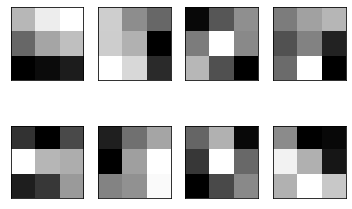

In [ ]:
# Visualizing the parameters of the first convolutional layer
param = model.get_weights()[0]
fig, axs = plt.subplots(nrows=2,ncols=4)
for idx in range(8):
  axs[idx//4,idx%4].imshow(param[:,:,0,idx],cmap='gray')
  axs[idx//4,idx%4].axes.xaxis.set_visible(False)
  axs[idx//4,idx%4].axes.yaxis.set_visible(False)

In [ ]:
# Checking the number of parameters in the model and some other details
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
re_lu_2 (ReLU)               (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        1152      
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 16)        64        
_________________________________________________________________
re_lu_3 (ReLU)               (None, 11, 11, 16)       

Creating a model

In [ ]:
# Defining my Model
class MyMLP(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.fc1 = tf.keras.layers.Dense(128,activation='relu')
    self.fc2 = tf.keras.layers.Dense(10,activation='softmax')
  def call(self,x):
    o = self.fc1(x)
    o = self.fc2(o)
    return o

In [ ]:
# Creating my Model
model = MyMLP()

In [ ]:
# Creating the dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train.reshape((-1,28*28)),y_train))
train_ds = train_ds.batch(128)

In [ ]:
# Training

# Defining the optimizer (how are we going to update the parameters based on the loss gradients)
optim = tf.keras.optimizers.Adam(learning_rate=0.01)
# Defining the loss function (what kind of measure are we going to use to calculate the error of our network)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# Training for 5 epochs
for epoch in range(5):
  tot_loss = 0
  # Sweeping along the batches
  for k,(x,y) in enumerate(train_ds):
    # Use the GradientTape to record the operations so TF can calculate the gradient later
    with tf.GradientTape() as tape:
      o = model(x,training=True)
      l = loss(y,o)
    # Calculate the gradient with the information of the tape
    grad = tape.gradient(l,model.trainable_variables)
    # Using the optimizer and the obtained gradients, update the parameters
    optim.apply_gradients(zip(grad,model.trainable_variables))
    tot_loss += l
    if k%1000 == 0:
      print("epoch: %s, loss: %f"%(epoch,tot_loss))

epoch: 0, loss: 2.434424
epoch: 1, loss: 0.088910
epoch: 2, loss: 0.126654
epoch: 3, loss: 0.213259
epoch: 4, loss: 0.071184


In [ ]:
# Calculate the predicted labels for the test dataset
pred = np.argmax(model(x_test.reshape((-1,784))),axis=1)

In [ ]:
# Calculate confusion matrix and accuracy
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[ 971    0    0    0    0    1    1    2    3    2]
 [   0 1117    1    4    5    0    1    0    4    3]
 [   7    0  993   15    4    0    3    2    7    1]
 [   3    0    5  986    0    5    0    2    2    7]
 [   8    0    3    0  942    0    7    1    1   20]
 [   2    0    0   22    1  853    2    1    3    8]
 [  12    3    1    0    6   25  907    0    4    0]
 [   3    3   19    5    9    0    0  972    4   13]
 [   2    0    4   30    5   19    1    1  901   11]
 [   2    2    0    9    5    1    0    2    2  986]]
0.9628


In [ ]:
# Saving the model
model.save_weights("mymlp_model_mnist_tf.ckpt")

Creating a Generative Adversarial Network

In [79]:
# Creating the generator model 
model_generator = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7*7*256,use_bias=False,input_shape=(100,)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),
                                    tf.keras.layers.Reshape((7,7,256)),
                                    tf.keras.layers.Conv2DTranspose(128,(5,5),padding='same',use_bias=False),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),
                                    tf.keras.layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same',use_bias=False),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.LeakyReLU(),
                                    tf.keras.layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding='same',use_bias=False,activation='tanh')
])

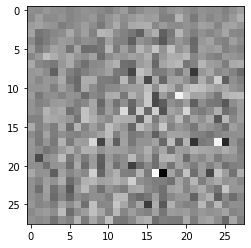

In [80]:
# Testing the generator model
noise = tf.random.normal([1,100])
img = model_generator(noise,training=False)
plt.imshow(img[0,:,:,0],cmap='gray')

In [81]:
# Creating the discriminator model
model_discriminator = tf.keras.models.Sequential([
                                                    tf.keras.layers.Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)),
                                                    tf.keras.layers.LeakyReLU(),
                                                    tf.keras.layers.Dropout(0.3),
                                                    tf.keras.layers.Conv2D(128,(5,5),strides=(2,2),padding='same'),
                                                    tf.keras.layers.LeakyReLU(),
                                                    tf.keras.layers.Dropout(0.3),
                                                    tf.keras.layers.Flatten(),
                                                    tf.keras.layers.Dense(1)
  ])

In [82]:
# Defining the cross entropy loss
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [83]:
# Defining the discriminator loss
def discriminator_loss(real_img,fake_img):
  real_loss = binary_cross_entropy(tf.ones_like(real_img),real_img)
  fake_loss = binary_cross_entropy(tf.zeros_like(fake_img),fake_img)
  return real_loss + fake_loss

In [84]:
# Defining the generator loss
def generator_loss(fake_img):
  return binary_cross_entropy(tf.ones_like(fake_img),fake_img)

In [85]:
# Defining the optimizer for the generator and discriminator model
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [87]:
# Creating the dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train.reshape((-1,28,28,1)),y_train))
train_ds = train_ds.batch(256)

In [88]:
# Function for training the model one step
@tf.function
def train_step(images):
  noise = tf.random.normal([128,100])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_img = model_generator(noise,training=True)

    real_img = model_discriminator(images,training=True)
    fake_img = model_discriminator(gen_img,training=True)

    gen_loss = generator_loss(fake_img)
    disc_loss = discriminator_loss(real_img,fake_img)
  
  grad_gen = gen_tape.gradient(gen_loss,model_generator.trainable_variables)
  grad_disc = disc_tape.gradient(disc_loss,model_discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(grad_gen,model_generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(grad_disc,model_discriminator.trainable_variables))

In [89]:
# Function for training the model
def train(ds,epochs):
  for epoch in range(epochs):
    print(epoch)
    for x,_ in ds:
      train_step(x)

In [90]:
# Training the model
train(train_ds,50)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


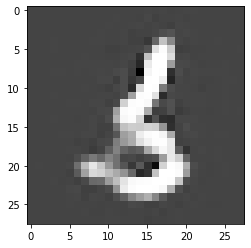

In [116]:
# Testing the trained model (generating some numbers)
noise = tf.random.normal([1,100]) 
img = model_generator(noise,training=False)
plt.imshow(img[0,:,:,0]*127.5 + 127.5,cmap='gray')

In [117]:
# Saving the discriminator and generator model
model_discriminator.save_weights("model_gan_disc.ckpt")
model_generator.save_weights("model_gan_gen.ckpt")